In [9]:
import pandas as pd
import numpy as np
import random as rd
import copy as cp
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def inicializaCluster(k):
    clusters = {}
    for i in range(k):
        clusters[i] = []
    return clusters

In [11]:
def inicializaCentroides(X,k):
    aux = X.tolist()
    centroides = rd.sample(aux, k)
    centroides = np.array(centroides)
    return centroides

In [12]:
def recalculate_clusters(X, centroids, k):
    clusters = inicializaCluster(k) 
    for data in X:
        distancias = []
        for i in range(k):
            distancia = np.linalg.norm(data - centroids[i])
            distancias.append(distancia)
        clusters[distancias.index(min(distancias))].append(data)
    return clusters

In [13]:
def recalculate_centroids(centroides, clusters, k):
    novo = cp.deepcopy(centroides)
    for i in range(k):
        novo[i] = np.average(clusters[i], axis=0)
    return novo

In [14]:
X = pd.read_csv('cluster.dat', sep = ' ', header = None)
X = (X-X.min())/(X.max()-X.min()) #Normalizando os dados de entrada
X = X.values 

k = 3
centroides_anterior = inicializaCentroides(X,k)
erro = 1
while erro != 0:
    clusters = recalculate_clusters(X, centroides_anterior, k)
    centroides_novo = recalculate_centroids(centroides_anterior, clusters, k)
    erro = np.linalg.norm(centroides_novo - centroides_anterior)
    centroides_anterior = cp.deepcopy(centroides_novo)

cluster1 = np.array(clusters[0])
cluster2 = np.array(clusters[1])
cluster3 = np.array(clusters[2])

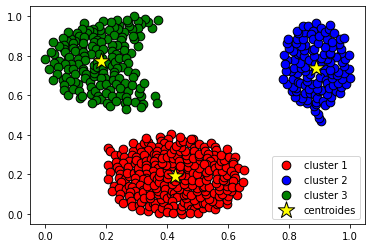

In [15]:
plt.scatter(
    cluster1[:,0] , cluster1[:,1],
    s=75, color='red',
    edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    cluster2[:,0] , cluster2[:,1],
    s=75, color='blue',
    edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    cluster3[:,0] , cluster3[:,1],
    s=75, color='green',
    edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    centroides_novo[:, 0], centroides_novo[:, 1],
    s=300, marker='*',
    c='yellow', edgecolor='black',
    label='centroides'
)

plt.legend(scatterpoints=1)
plt.show()
